## #1 Prepare the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [2]:
# Separate X and y data
x = df.drop(columns=['species', 'target'], axis=1)
y = df.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [4]:
# Scale the X data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## #2 Calculate distance between the Test Points in All Data

In [5]:
# Testing to see results from sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [6]:
y_pred_test = clf.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0], dtype=int64)

## #3 Calculate the [accuracy](https://stackoverflow.com/questions/37665680/how-does-sklearn-compute-the-accuracy-score-step-by-step)

In [7]:
from sklearn.metrics import accuracy_score

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")

Sklearn KNN Accuracy: 0.9736842105263158


## #4 Calculate the [accuracy](https://stackoverflow.com/questions/37665680/how-does-sklearn-compute-the-accuracy-score-step-by-step) in every $k$

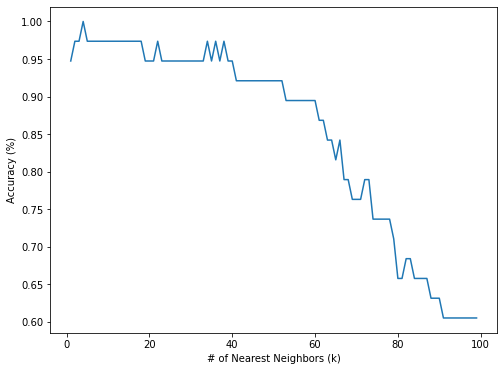

In [8]:
# Obtain accuracy score varying k from 1 to 99
accuracies = []

for k in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=k, p=1)
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');